# **Visualizing the History of Mass Shootings in the USA Using Matplotlib**

## **Introduction**

Mass shootings have become a significant concern in the United States, with far-reaching social, political, and psychological implications. These tragic events not only cause immediate harm to victims and their families but also impact communities, fuel national debates on gun control, and influence policy-making at both state and federal levels. Understanding the patterns, frequency, and geographic distribution of mass shootings can help inform discussions around prevention strategies and public safety measures.

This project aims to leverage **Matplotlib**, a powerful data visualization library in Python, to explore and analyze a dataset that chronicles the history of mass shootings across the United States. By creating insightful visualizations, we aim to uncover trends over time, identify hotspots of violence, and analyze the severity of incidents in terms of fatalities and injuries. 

This project is not just an exercise in data analysis; it serves as a comprehensive guide to mastering Matplotlib's capabilities. We'll explore everything from basic plotting techniques to advanced customizations, empowering you to create professional and impactful visualizations for any dataset.

---

## **Objectives**

1. **Understand Trends Over Time:**  
   Analyze how the frequency and severity of mass shootings have evolved over the years.
   
2. **Geographical Distribution:**  
   Identify which states and cities have experienced the highest number of incidents.

3. **Severity Analysis:**  
   Examine the number of fatalities and injuries in each incident to understand the overall impact.

4. **Seasonal and Monthly Patterns:**  
   Investigate whether mass shootings occur more frequently during certain times of the year.

5. **Master Matplotlib:**  
   Use this project as a hands-on learning experience to master Matplotlib, covering everything from basic plots to advanced visualizations.

---

## **Dataset Description**

The dataset titled **"History of Mass Shootings in the USA"** contains detailed information about mass shooting incidents across various cities and states in the United States. The data spans multiple years and includes key information about each incident's location, date, and severity.

### **Dataset Columns:**

1. **Date:**  
   The date on which the mass shooting occurred, formatted as day-month-year (e.g., 31-07-2022).

2. **City:**  
   The city where the mass shooting took place.

3. **State:**  
   The U.S. state in which the incident occurred.

4. **Dead:**  
   The number of people who lost their lives in the incident.

5. **Injured:**  
   The number of people who were injured in the incident.

6. **Total:**  
   The sum of fatalities and injuries, representing the total number of victims affected in each event.

7. **Description:**  
   A brief narrative that provides additional context about the incident, including circumstances or notable details.


## **Exploration Focus Areas**

1. **Temporal Analysis:**
   - **Yearly Trends:** Are mass shootings increasing over time?
   - **Monthly Patterns:** Do incidents cluster around specific times of the year?

2. **Geographic Distribution:**
   - **State-wise Analysis:** Which states are most affected?
   - **City Hotspots:** Identifying the cities with the highest number of incidents.

3. **Severity and Impact:**
   - **Fatalities and Injuries:** How severe are these incidents? What is the distribution of casualties?
   - **Deadliest Incidents:** Highlighting the most catastrophic events.

4. **Comparative Insights:**
   - **Fatalities vs. Injuries:** Are there more incidents with higher injuries than fatalities? What patterns emerge?
   - **State Comparisons:** Which regions experience more severe incidents compared to others?

---

## **Step-by-Step Analysis Using Matplotlib**

### **Step 1: Load and Understand the Dataset**

In [1]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/history-of-the-mass-shooting-in-usa/History_of_Mass_Shootings_in_the_USA.csv'
data = pd.read_csv(file_path)

# Display basic info and first few rows
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2712 non-null   object
 1   City         2712 non-null   object
 2   State        2712 non-null   object
 3   Dead         2712 non-null   int64 
 4   Injured      2712 non-null   int64 
 5   Total        2712 non-null   int64 
 6   Description  2712 non-null   object
dtypes: int64(3), object(4)
memory usage: 148.4+ KB
None
         Date          City        State  Dead  Injured  Total  \
0  31-07-2022       Decatur     Illinois     1        3      4   
1  31-07-2022      Hartford  Connecticut     0        4      4   
2  31-07-2022  Indianapolis      Indiana     0        4      4   
3  31-07-2022       Detroit     Michigan     1        7      8   
4  31-07-2022       Orlando      Florida     0        7      7   

                                         Description  
0  Four teenager

### **Step 2: Data Preprocessing**

In [2]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Extract Year and Month for further analysis
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Verify the changes
print(data.head())

        Date          City        State  Dead  Injured  Total  \
0 2022-07-31       Decatur     Illinois     1        3      4   
1 2022-07-31      Hartford  Connecticut     0        4      4   
2 2022-07-31  Indianapolis      Indiana     0        4      4   
3 2022-07-31       Detroit     Michigan     1        7      8   
4 2022-07-31       Orlando      Florida     0        7      7   

                                         Description  Year  Month  
0  Four teenagers, one of whom died, were shot at...  2022      7  
1  Four people, including a teenager, were shot i...  2022      7  
2  Four people were shot after a fight in the Bro...  2022      7  
3  One person was killed, and seven others were i...  2022      7  
4  Seven people were shot when someone opened fir...  2022      7  


### **Step 3: Trend Analysis of Mass Shootings Over Time**

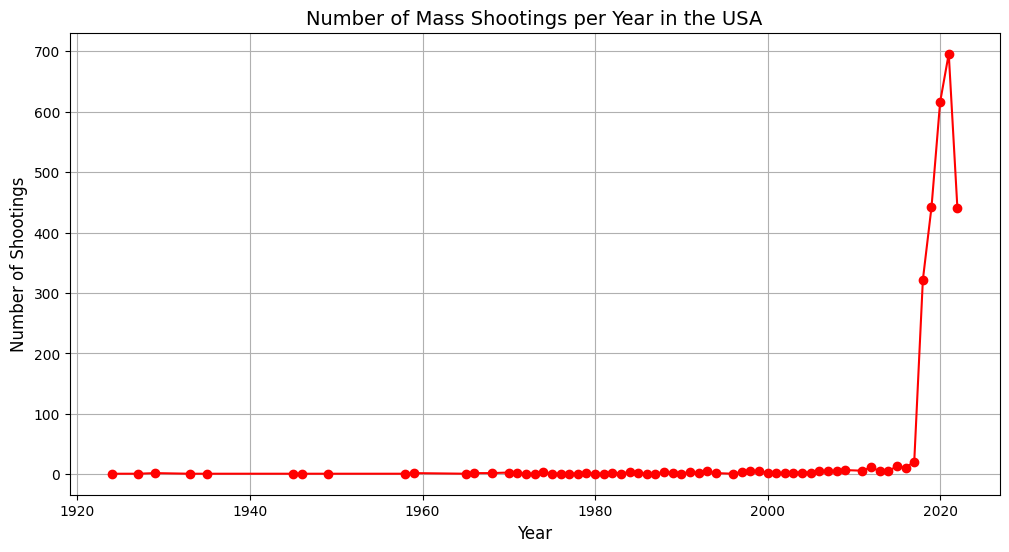

In [3]:
import matplotlib.pyplot as plt

# Group data by year and count the number of incidents
yearly_counts = data.groupby('Year').size()

# Plot the trend of mass shootings over time
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='r')

# Customization
plt.title('Number of Mass Shootings per Year in the USA', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Shootings', fontsize=12)
plt.grid(True)
plt.show()

### **Step 4: State-wise Distribution of Mass Shootings**


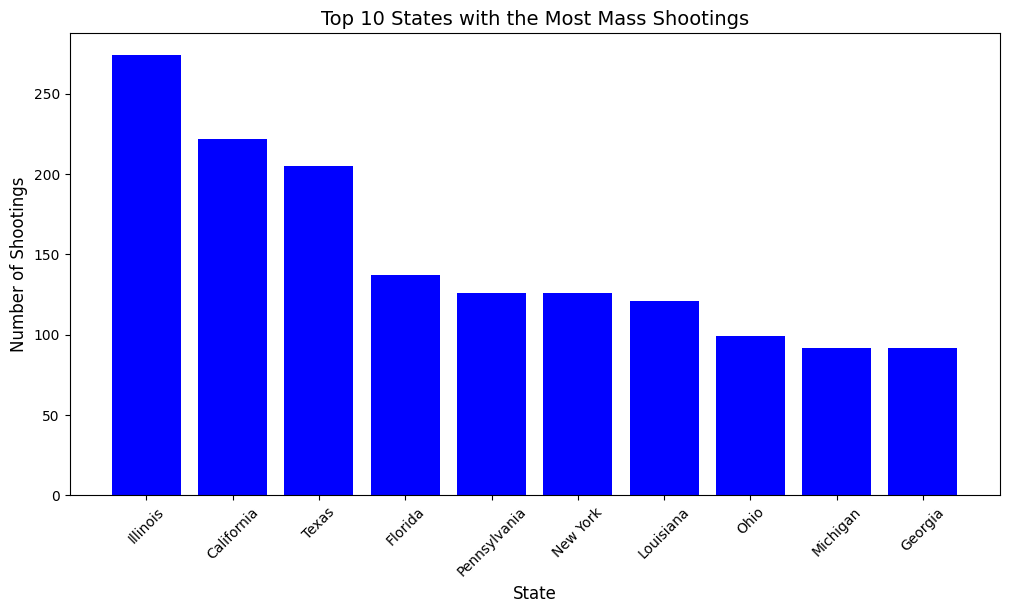

In [4]:
# Count the number of incidents per state
state_counts = data['State'].value_counts().head(10)  # Top 10 states

# Plot
plt.figure(figsize=(12, 6))
plt.bar(state_counts.index, state_counts.values, color='blue')

# Customization
plt.title('Top 10 States with the Most Mass Shootings', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Shootings', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### **Step 5: Distribution of Fatalities and Injuries**

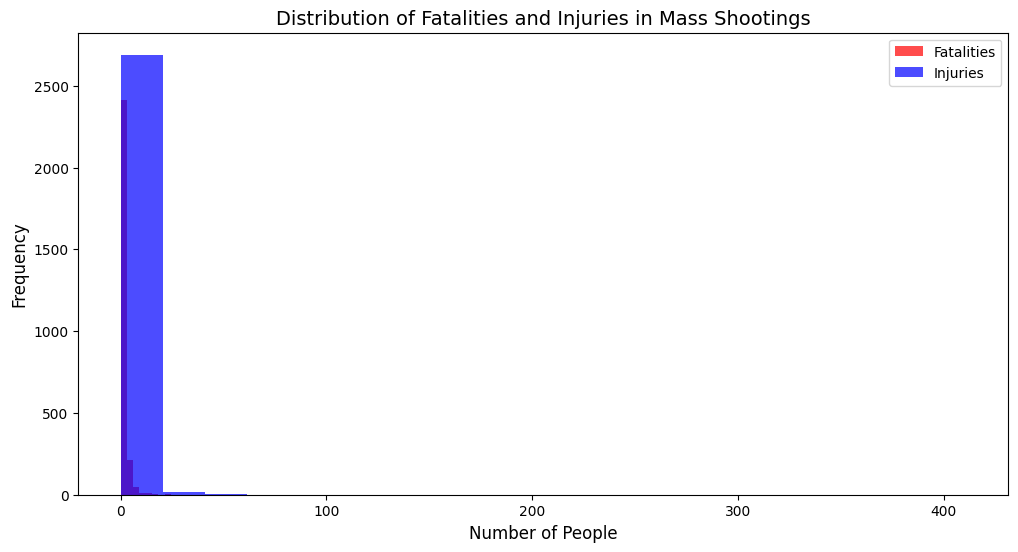

In [5]:
plt.figure(figsize=(12, 6))

# Plot histogram for fatalities
plt.hist(data['Dead'], bins=20, alpha=0.7, label='Fatalities', color='red')

# Plot histogram for injuries
plt.hist(data['Injured'], bins=20, alpha=0.7, label='Injuries', color='blue')

# Customization
plt.title('Distribution of Fatalities and Injuries in Mass Shootings', fontsize=14)
plt.xlabel('Number of People', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

### **Step 6: Monthly Trends in Mass Shootings**

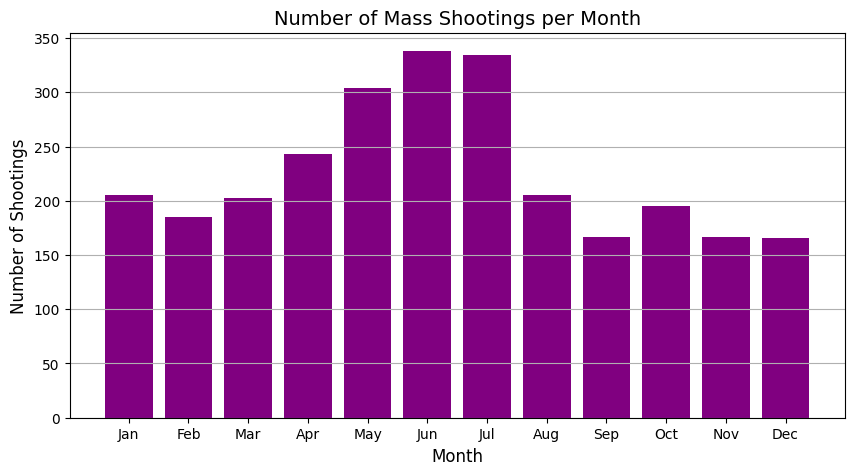

In [6]:
# Group by Month
monthly_counts = data.groupby('Month').size()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(monthly_counts.index, monthly_counts.values, color='purple')

# Customization
plt.title('Number of Mass Shootings per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Shootings', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

### **Step 7: Fatalities vs. Injuries in Mass Shootings**

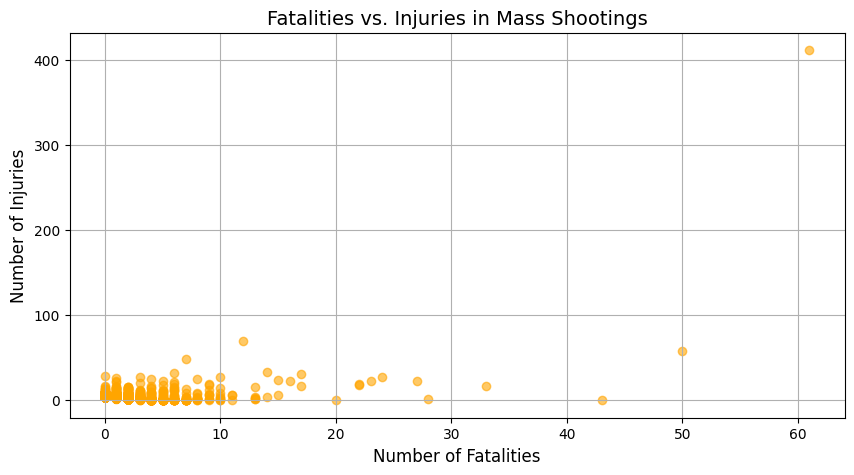

In [7]:
plt.figure(figsize=(10, 5))

# Scatter plot
plt.scatter(data['Dead'], data['Injured'], alpha=0.6, color='orange')

# Customization
plt.title('Fatalities vs. Injuries in Mass Shootings', fontsize=14)
plt.xlabel('Number of Fatalities', fontsize=12)
plt.ylabel('Number of Injuries', fontsize=12)
plt.grid(True)
plt.show()

### **Step 8: Most Deadly Incidents**

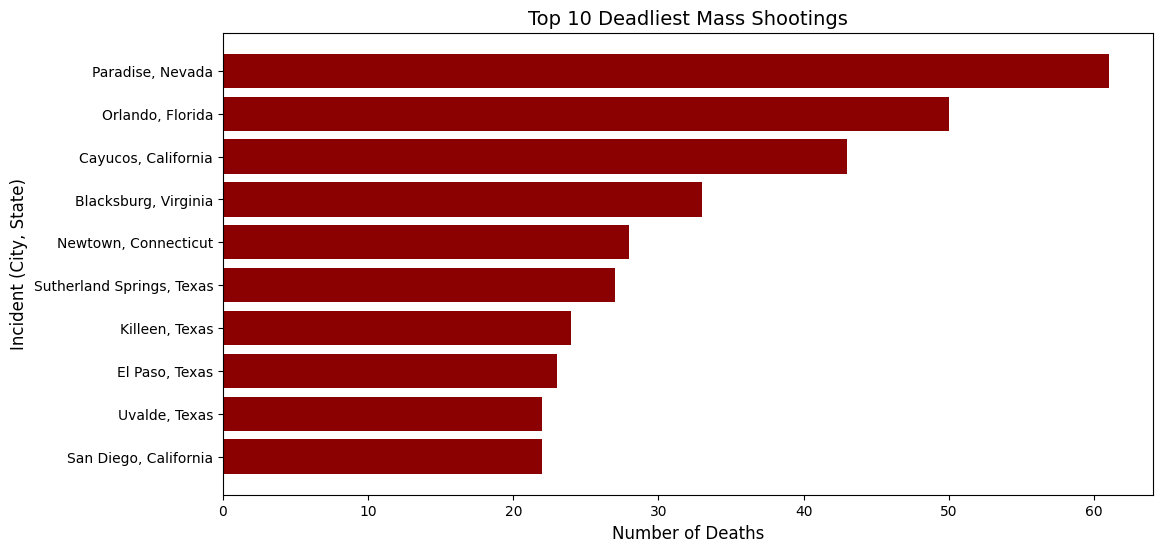

In [8]:
# Sort data by number of deaths
deadliest_incidents = data.sort_values(by='Dead', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(deadliest_incidents['City'] + ', ' + deadliest_incidents['State'], deadliest_incidents['Dead'], color='darkred')

# Customization
plt.title('Top 10 Deadliest Mass Shootings', fontsize=14)
plt.xlabel('Number of Deaths', fontsize=12)
plt.ylabel('Incident (City, State)', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

### **Step 9: Heatmap for Monthly Trends**

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


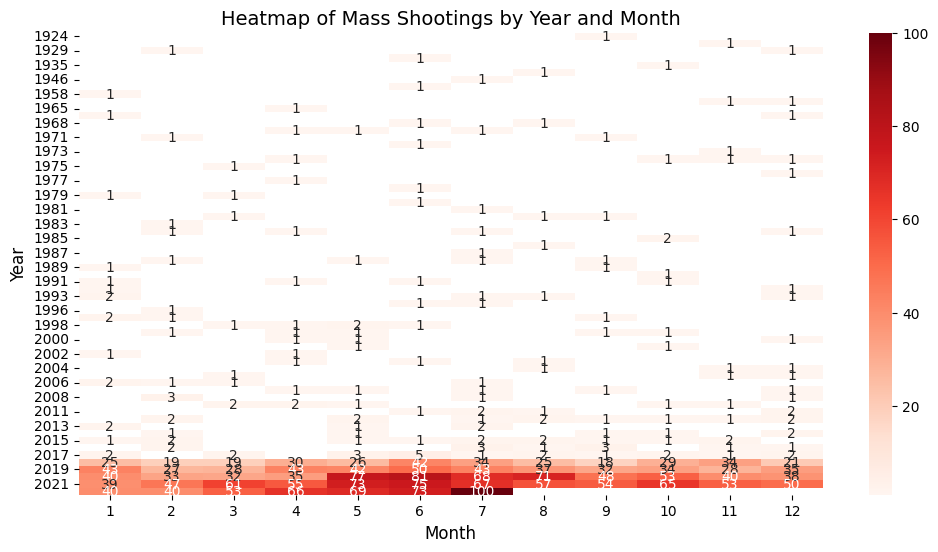

In [9]:
import seaborn as sns

# Create a pivot table
heatmap_data = data.pivot_table(index='Year', columns='Month', values='Total', aggfunc='count')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='.0f')

# Customization
plt.title('Heatmap of Mass Shootings by Year and Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.show()

## **Conclusion**

By working through this project, we covered:
- **Basic Matplotlib functionalities**: Line plots, bar charts, histograms, scatter plots.
- **Advanced customizations**: Titles, labels, legends, color adjustments.
- **Data-driven insights**: Trends, distributions, state-wise patterns.

This comprehensive project helps solidify your understanding of both data visualization techniques and the tragic reality of mass shootings in the USA.